In [1]:
import os
os.chdir("..")
import torch
from epilearn.models.Temporal.SIR import SIR, SEIR, SIS
from epilearn.models.SpatialTemporal.NetworkSIR import NetSIR
from epilearn.models.Temporal.SIR import SIR
from epilearn.utils import utils, simulation
from epilearn.utils.simulation import Time_geo
from epilearn.data.dataset import UniversalDataset
from epilearn import visualize

### Generate random static graph

In [2]:
# generate random static graph
initial_graph = simulation.get_random_graph(num_nodes=25, connect_prob=0.20)
initial_states = torch.zeros(25,3) # [S,I,R]
initial_states[:, 0] = 1
# set infected individual: 3
initial_states[3, 0] = 0
initial_states[3, 1] = 1
initial_states[10, 0] = 0
initial_states[10, 1] = 1

### Initialize NetworkSIR model and perform simulation based on the generated inital graph

In [3]:
model = NetSIR(num_nodes=initial_graph.shape[0], horizon=120, infection_rate=0.05, recovery_rate=0.05) # infection_rate, recover_rate, fixed_population
preds = model(initial_states, initial_graph, steps = None)

In [4]:
preds.argmax(2).shape

torch.Size([120, 25])

### Plot simulation result at a certain time point

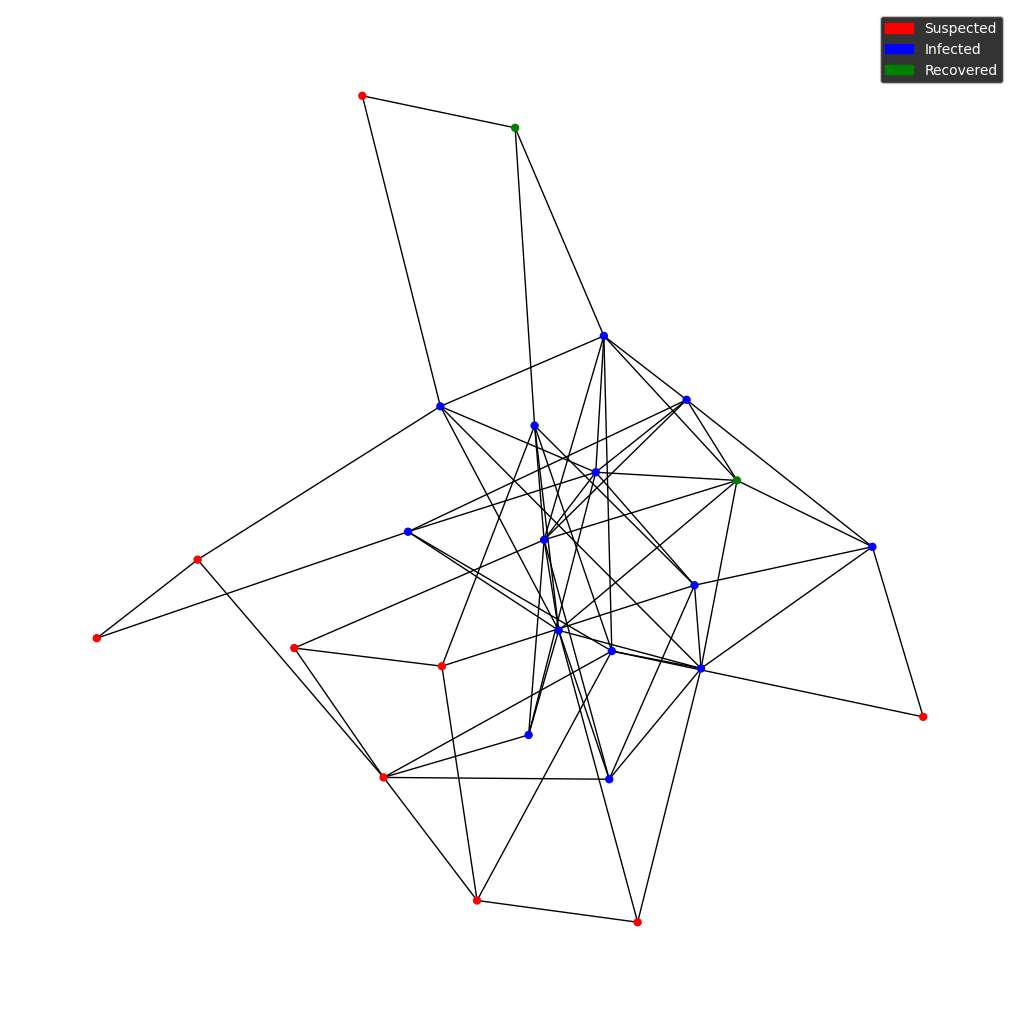

In [5]:
layout = visualize.plot_graph(preds.argmax(2)[15].detach().numpy(), initial_graph.to_sparse().indices().detach().numpy(), classes=['Suspected', 'Infected', 'Recovered'])

### Simulate with SIR (above individual-level)

In [6]:
model = SIR(horizon=190, infection_rate=0.05, recovery_rate=0.05) # infection_rate, recover_rate, fixed_population
preds = model(initial_states.sum(0), steps = None)

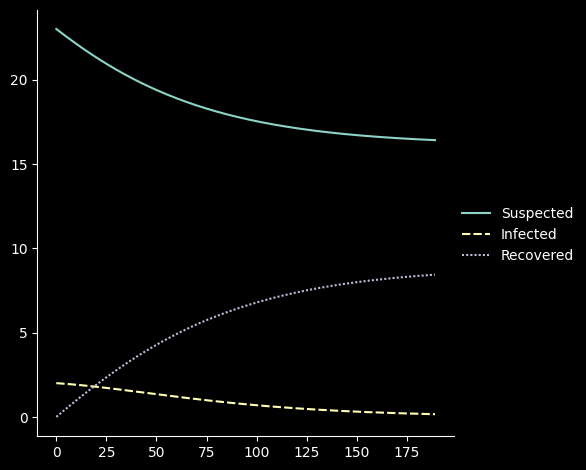

In [7]:
layout = visualize.plot_series(preds.detach().numpy(), columns=['Suspected', 'Infected', 'Recovered'])

### Construct graph from feature

In [8]:
feature = torch.rand(10,20)
adj = torch.randint(10,100, (10,10))
graph1 = simulation.get_graph_from_features(features=feature, adj=None)
graph2 = simulation.get_graph_from_features(features=feature, adj=adj)

In [9]:
graph1

tensor([[1.0000, 0.7808, 0.8003, 0.6512, 0.8244, 0.7968, 0.7771, 0.7579, 0.8322,
         0.8080],
        [0.7808, 1.0000, 0.8470, 0.8090, 0.8661, 0.8114, 0.8116, 0.7958, 0.7089,
         0.8266],
        [0.8003, 0.8470, 1.0000, 0.6816, 0.9092, 0.7984, 0.8456, 0.7888, 0.7578,
         0.7607],
        [0.6512, 0.8090, 0.6816, 1.0000, 0.7030, 0.7851, 0.7487, 0.7616, 0.6598,
         0.8302],
        [0.8244, 0.8661, 0.9092, 0.7030, 1.0000, 0.7943, 0.8051, 0.8155, 0.7977,
         0.8477],
        [0.7968, 0.8114, 0.7984, 0.7851, 0.7943, 1.0000, 0.8112, 0.8057, 0.8145,
         0.8651],
        [0.7771, 0.8116, 0.8456, 0.7487, 0.8051, 0.8112, 1.0000, 0.8642, 0.7064,
         0.7891],
        [0.7579, 0.7958, 0.7888, 0.7616, 0.8155, 0.8057, 0.8642, 1.0000, 0.7789,
         0.8016],
        [0.8322, 0.7089, 0.7578, 0.6598, 0.7977, 0.8145, 0.7064, 0.7789, 1.0000,
         0.8254],
        [0.8080, 0.8266, 0.7607, 0.8302, 0.8477, 0.8651, 0.7891, 0.8016, 0.8254,
         1.0000]])

In [10]:
graph2

tensor([[0.0135, 0.0300, 0.0170, 0.0107, 0.0137, 0.0133, 0.0108, 0.0110, 0.0090,
         0.0105],
        [0.0269, 0.0141, 0.0385, 0.0137, 0.0247, 0.0193, 0.0189, 0.0204, 0.0127,
         0.0100],
        [0.0105, 0.0282, 0.0667, 0.0341, 0.0101, 0.0082, 0.0104, 0.0168, 0.0077,
         0.0317],
        [0.0283, 0.0130, 0.0122, 0.0294, 0.0167, 0.0111, 0.0107, 0.0115, 0.0127,
         0.0268],
        [0.0217, 0.0135, 0.0178, 0.0293, 0.0182, 0.0081, 0.0144, 0.0146, 0.0111,
         0.0314],
        [0.0080, 0.0138, 0.0100, 0.0084, 0.0099, 0.0227, 0.0119, 0.0083, 0.0087,
         0.0333],
        [0.0120, 0.0451, 0.0604, 0.0080, 0.0179, 0.0737, 0.0357, 0.0096, 0.0172,
         0.0093],
        [0.0205, 0.0796, 0.0202, 0.0272, 0.0099, 0.0620, 0.0094, 0.0455, 0.0159,
         0.0131],
        [0.0347, 0.0083, 0.0361, 0.0118, 0.0101, 0.0113, 0.0102, 0.0211, 0.0120,
         0.0266],
        [0.0192, 0.0123, 0.0114, 0.0134, 0.0212, 0.0180, 0.0105, 0.0321, 0.0127,
         0.0127]])

### Simulate trace with TimeGEO

In [10]:
# prepare initial data
import numpy as np
import numpy as np

data = {
    1: {
        0: {
            'loc': np.array([3744, 1901, 1995, 2653, 2743, 2744, 2654, 2743, 2745], dtype=int),
            'tim': np.array([6075.83333333, 6113.5, 6503.81666667, 6518.23333333, 6568.8, 6640.73333333, 6664.25, 6708.61666667, 6747.83333333], dtype=np.float64),
            'sta': np.array([37.66666667, 390.31666667, 14.41666667, 50.56666667, 71.93333333, 23.51666667, 44.36666667, 39.21666667, 99.75], dtype=np.float64)
        },
        1: {
            'loc': np.array([2653, 2744, 2654, 2653, 2654, 2653], dtype=int),
            'tim': np.array([297580.38333333, 297645.8, 297661.83333333, 297682.41666667, 297693.05, 297788.05], dtype=np.float64),
            'sta': np.array([65.41666667, 16.03333333, 20.58333333, 10.63333333, 95.0, 10.58333333], dtype=np.float64)
        }
    },
    3: {
        0: {
            'loc': np.array([2244, 2173, 2248, 2395, 2547, 2477, 1853], dtype=int),
            'tim': np.array([11740.61666667, 11757.53333333, 11778.65, 11819.31666667, 11833.56666667, 12035.68333333, 12064.13333333], dtype=np.float64),
            'sta': np.array([16.91666667, 21.11666667, 40.66666667, 14.25, 202.11666667, 28.45, 1383.16666667], dtype=np.float64)
        }
    },
    5: {
        0: {
            'loc': np.array([2741, 2654, 2653, 2743, 2341], dtype=int),
            'tim': np.array([89855.71666667, 89881.15, 89909.1, 90020.8, 90216.95], dtype=np.float64),
            'sta': np.array([25.43333333, 27.95, 111.7, 196.15, 34.91666667], dtype=np.float64)
        },
        1: {
            'loc': np.array([2653, 2744, 2653, 2823, 2744], dtype=int),
            'tim': np.array([236819.35, 236892.11666667, 236908.31666667, 236923.75, 237041.66666667], dtype=np.float64),
            'sta': np.array([72.76666667, 16.2, 15.43333333, 117.91666667, 32.93333333], dtype=np.float64)
        },
        2: {
            'loc': np.array([2653, 2652, 2744, 2653, 2743], dtype=int),
            'tim': np.array([75474.86666667, 75494.3, 75563.6, 75598.66666667, 75629.6], dtype=np.float64),
            'sta': np.array([19.43333333, 69.3, 35.06666667, 30.93333333, 142.6], dtype=np.float64)
        }
    }
}


In [11]:

def gen_gps_data():
    # 设置随机种子以确保结果的可重复性
    np.random.seed(42)

    # 定义生成GPS数据的数量
    num_gps_points = 4528

    # 假定一个基准点，围绕这个点生成随机的GPS坐标
    base_latitude = 35.51168469
    base_longitude = 139.6733776

    # 定义坐标变动的范围
    latitude_variation = 0.0005  # 纬度变化范围
    longitude_variation = 0.012  # 经度变化范围

    # 生成随机的GPS坐标数据
    gps_data = np.zeros((num_gps_points, 2))  # 初始化数组
    for i in range(num_gps_points):
        random_latitude_shift = np.random.uniform(-latitude_variation, latitude_variation)
        random_longitude_shift = np.random.uniform(-longitude_variation, longitude_variation)
        gps_data[i][0] = base_latitude + random_latitude_shift
        gps_data[i][1] = base_longitude + random_longitude_shift

    return gps_data

In [12]:

class Parameters:
    def __init__(self, data_type):
        self.data_type = data_type

    # 数据相关信息
    def data_info(self, GPS):
        self.GPS = GPS
        self.tim_size = 1440

# 创建参数实例，直接在代码中设置参数
data_type = 'Example Data'
param = Parameters(data_type)

gps_data = gen_gps_data()
param.data_info(gps_data)

In [13]:
from tqdm import tqdm

def padding(traj, tim_size):
    def intcount(seq):
        a, b = np.array(seq[:-1]), np.array(seq[1:])
        return (a == a.astype(int)) + np.ceil(b) - np.floor(a) - 1
    locs = np.concatenate(([-1], traj['loc'], [-1]))
    tims = np.concatenate(([0], traj['tim'] % tim_size, [tim_size]))
    tims[-2] = tims[-1] if (tims[-2] < tims[-3]) else tims[-2]
    return np.concatenate([[locs[id]] * int(n) for id, n in enumerate(intcount(tims))]).astype(int)

def fixed(pad_traj, slot = 30):
    return np.array([np.argmax(np.bincount((pad_traj + 1)[(slot*i):(slot*i+slot)])) - 1 for i in range(int(len(pad_traj)/slot))])

def to_fixed(traj, tim_size, slot = 30):
    a = fixed(padding(traj, tim_size), slot)
    return np.where(a==-1, a[-1], a)

def to_std(traj, tim_size, detrans, time_slot=10):
    id = np.append(True, traj[1:] != traj[:-1])
    loc, tim = np.array(list(map(detrans,  traj[id]))), np.arange(0, tim_size, time_slot)[id]
    sta = np.append(tim[1:], tim_size) - tim
    return {'loc': loc, 'tim':tim, 'sta': sta}

def TimeGeo(data, param):
    TG = {}
    gen_bar = tqdm(data.items())
    for uid, trajs in gen_bar:
        gen_bar.set_description("TimeGeo - Generating trajectories for user: {}".format(uid))

        locations = np.sort(np.unique(np.concatenate([trajs[traj]['loc'] for traj in trajs])))
        trans = lambda x:np.where(locations == x)[0][0]
        detrans = lambda x:locations[x]

        input = np.array([to_fixed({'loc': list(map(trans, traj['loc'])), 'tim': traj['tim'], 'sta': traj['sta']}, param.tim_size, 10) for traj in trajs.values()])
        time_geo = Time_geo(param.GPS[np.ix_(locations)], np.bincount(input.flatten()) / np.cumprod(input.shape)[-1], simu_slot=param.tim_size//10)
        TG[uid] = {id: to_std(r['trace'][:, 0], param.tim_size, detrans) for id, r in enumerate(time_geo.pop_info)}
 
    return TG

In [14]:
simulated_data = TimeGeo(data, param)

TimeGeo - Generating trajectories for user: 5: 100%|██████████| 3/3 [00:00<00:00, 265.77it/s]
